In [239]:
# Libraries
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt

In [76]:
collections=pd.read_csv("collections.csv")

In [77]:
collections.head(5)

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,True,True,True
1,45,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,True,True,False
3,53,9999,2022-07,verified,9,own,900.0,250,False,False,True,True,False
4,6,9602,2021-06,verified,8,own,NaN,250,False,False,True,True,False


In [4]:
collections.shape

(48, 13)

In [5]:
collections['seller_fees'].fillna((collections['seller_fees'].median()), inplace=True)

In [6]:
collections.isnull().sum()

collection_id          0
total_supply           0
creation_date          0
verification_status    0
n_of_traits            0
contract_type          0
seller_fees            0
platform_fees          0
openrarity_enabled     0
has_website            0
has_own_twitter        0
has_discord            0
has_medium             0
dtype: int64

In [68]:
collections.corr()

,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
collection_id,1.000000,-0.003575,-0.078383,0.234503,NaN,0.146007,NaN,NaN,0.182109,-0.179436
total_supply,-0.003575,1.000000,0.118529,-0.206401,NaN,-0.118385,NaN,NaN,-0.476969,-0.081006
n_of_traits,-0.078383,0.118529,1.000000,-0.014847,NaN,-0.113315,NaN,NaN,0.119100,0.464439
seller_fees,0.234503,-0.206401,-0.014847,1.000000,NaN,-0.233605,NaN,NaN,-0.021221,-0.061224
platform_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openrarity_enabled,0.146007,-0.118385,-0.113315,-0.233605,NaN,1.000000,NaN,NaN,0.332302,-0.118993
has_website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_own_twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_discord,0.182109,-0.476969,0.119100,-0.021221,NaN,0.332302,NaN,NaN,1.000000,0.225296
has_medium,-0.179436,-0.081006,0.464439,-0.061224,NaN,-0.118993,NaN,NaN,0.225296,1.000000


In [7]:
coll_twitter_stats=pd.read_csv("collections_twitter_stats.csv")

In [8]:
coll_twitter_stats.head()

,collection_id,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2,183.000000,8.500000,41.000000,123,3,6,243,14,76
1,1,16,36.375000,3.562500,13.937500,0,0,0,125,21,34
2,2,1,15.000000,9.000000,1.000000,15,9,1,15,9,1
3,3,526,1.178707,0.306084,2.655894,0,0,0,21,8,13
4,4,26,8.153846,0.884615,1.153846,0,0,0,30,6,12


In [69]:
coll_twitter_stats.corr()

,collection_id,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
collection_id,1.000000,-0.063718,0.438026,0.386112,0.375448,0.253494,0.289595,0.201764,0.384258,0.275722,0.303630
n_tweets_in_range,-0.063718,1.000000,-0.155413,-0.106055,-0.147836,-0.116293,-0.115993,-0.173977,-0.091132,-0.057359,-0.093478
avg_likes,0.438026,-0.155413,1.000000,0.756749,0.871392,0.762428,0.608901,0.610404,0.747301,0.498283,0.636411
avg_replies,0.386112,-0.106055,0.756749,1.000000,0.873384,0.343664,0.307724,0.280196,0.979529,0.933575,0.915802
avg_retweets,0.375448,-0.147836,0.871392,0.873384,1.000000,0.612644,0.401108,0.653676,0.850479,0.716567,0.862666
min_likes,0.253494,-0.116293,0.762428,0.343664,0.612644,1.000000,0.729457,0.689304,0.294072,0.058002,0.256788
min_replies,0.289595,-0.115993,0.608901,0.307724,0.401108,0.729457,1.000000,0.551466,0.244085,0.031657,0.146762
min_retweets,0.201764,-0.173977,0.610404,0.280196,0.653676,0.689304,0.551466,1.000000,0.212570,0.023722,0.266319
max_likes,0.384258,-0.091132,0.747301,0.979529,0.850479,0.294072,0.244085,0.212570,1.000000,0.939126,0.931193
max_replies,0.275722,-0.057359,0.498283,0.933575,0.716567,0.058002,0.031657,0.023722,0.939126,1.000000,0.911796


In [12]:
train_data=pd.read_csv("nfts_train.csv")

In [13]:
train_data.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,21928,0,49,2.000000,NaN,NaN,NaN,2022-11,1.266732
1,32621,0,45,97.077216,NaN,NaN,NaN,2021-08,1.200357
2,32622,1,45,139.453086,NaN,NaN,NaN,2022-08,3.180572
3,32623,2,45,127.753445,NaN,NaN,NaN,2021-08,3.502910
4,32624,3,45,112.315719,NaN,NaN,NaN,2022-09,4.009567


In [70]:
train_data.corr()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
global_index,1.000000,0.256524,-3.335046e-02,0.104044,1.971414e-03,-0.201513,-4.406700e-01,-0.096667
nft_id,0.256524,1.000000,8.095701e-02,0.288882,8.299736e-02,0.124780,4.524562e-01,-0.055394
collection_id,-0.033350,0.080957,1.000000e+00,0.085688,-5.110233e-15,-0.085335,-1.883431e-01,-0.118710
rarity_score,0.104044,0.288882,8.568761e-02,1.000000,2.887302e-01,-0.169245,-5.093534e-02,-0.046505
openrarity_score,0.001971,0.082997,-5.110233e-15,0.288730,1.000000e+00,-0.756742,-4.248309e-15,0.109438
openrarity_rank,-0.201513,0.124780,-8.533454e-02,-0.169245,-7.567425e-01,1.000000,4.525465e-01,-0.076041
openrarity_max_rank,-0.440670,0.452456,-1.883431e-01,-0.050935,-4.248309e-15,0.452546,1.000000e+00,-0.098312
last_sale_price,-0.096667,-0.055394,-1.187096e-01,-0.046505,1.094378e-01,-0.076041,-9.831228e-02,1.000000


In [71]:
train_data.replace(np.nan,0,inplace=True)

In [14]:
train_with_collection=pd.merge(collections,coll_twitter_stats,on="collection_id")
train_with_collection.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,11,43.454545,5.454545,94.272727,0,0,36,239,30,258
1,45,8888,2021-07,verified,5,own,500.0,250,False,False,...,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,7,593.714286,80.285714,110.285714,94,43,14,1532,153,386
3,53,9999,2022-07,verified,9,own,900.0,250,False,False,...,8,707.875000,103.875000,314.000000,236,26,46,1381,242,873
4,6,9602,2021-06,verified,8,own,750.0,250,False,False,...,12,0.000000,0.000000,111.833333,0,0,31,0,0,463


In [15]:
train_with_collection=pd.merge(train_with_collection,train_data,on="collection_id")

In [16]:
train_with_collection["openrarity_score"].value_counts()

1.973398    70
0.779231    59
0.779281    47
0.770424    44
0.770374    40
            ..
0.877011     1
1.030426     1
1.101704     1
0.985661     1
0.846365     1
Name: openrarity_score, Length: 74642, dtype: int64

In [17]:
train_with_collection.head()

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322076,0,48.156807,NaN,NaN,NaN,2022-11,12.508229
1,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322077,1,82.404768,NaN,NaN,NaN,2022-11,0.000800
2,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322078,2,30.983457,NaN,NaN,NaN,2022-11,0.002823
3,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322079,3,62.799472,NaN,NaN,NaN,2021-11,85.009723
4,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322080,4,45.523411,NaN,NaN,NaN,2021-11,0.009392


In [21]:
train_with_collection["n_of_traits"].value_counts()

8     75602
11    61022
10    23457
14    21476
9     20137
13    19667
6     15555
12    15000
7     10000
19     9928
1      9928
5      8888
16     7751
31     6501
27     3997
4      1000
2         1
Name: n_of_traits, dtype: int64

In [24]:
train_with_collection[train_with_collection["n_of_traits"].values<12]

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322076,0,48.156807,NaN,NaN,NaN,2022-11,12.508229
1,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322077,1,82.404768,NaN,NaN,NaN,2022-11,0.000800
2,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322078,2,30.983457,NaN,NaN,NaN,2022-11,0.002823
3,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322079,3,62.799472,NaN,NaN,NaN,2021-11,85.009723
4,19,1000,2021-04,verified,4,own,500.0,250,False,False,...,30,258,322080,4,45.523411,NaN,NaN,NaN,2021-11,0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303404,14,6969,2021-10,verified,11,own,750.0,250,False,False,...,6,22,363249,6964,290.864188,NaN,NaN,NaN,2022-09,0.352653
303405,14,6969,2021-10,verified,11,own,750.0,250,False,False,...,6,22,363250,6965,254.663120,NaN,NaN,NaN,2022-09,0.007495
303406,14,6969,2021-10,verified,11,own,750.0,250,False,False,...,6,22,363251,6966,225.229472,NaN,NaN,NaN,2022-09,0.006492
303407,14,6969,2021-10,verified,11,own,750.0,250,False,False,...,6,22,363252,6967,522.769897,NaN,NaN,NaN,2021-11,0.102316


In [29]:
data=train_with_collection[train_with_collection["openrarity_enabled"].values==True]
data

,collection_id,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,...,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
9888,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,153,386,499074,0,95.156519,1.030583,3213.0,10000.0,2022-08,0.009690
9889,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,153,386,499075,1,33.357764,0.814998,8878.0,10000.0,2022-08,0.008443
9890,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,153,386,499076,2,35.812541,0.833099,8357.0,10000.0,2022-05,30.003636
9891,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,153,386,499077,3,82.490056,0.859126,7514.0,10000.0,2022-05,0.002143
9892,44,10000,2022-04,verified,8,own,500.0,250,True,False,...,153,386,499078,4,123.194870,1.033852,3178.0,10000.0,2022-05,0.001860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296435,50,9999,2021-12,approved,8,own,1000.0,250,True,False,...,74,162,206758,9994,409.767485,1.287648,290.0,9999.0,2022-01,1.500185
296436,50,9999,2021-12,approved,8,own,1000.0,250,True,False,...,74,162,206759,9995,326.138664,0.994475,5090.0,9999.0,2021-12,0.405717
296437,50,9999,2021-12,approved,8,own,1000.0,250,True,False,...,74,162,206760,9996,354.386951,1.031258,3826.0,9999.0,2021-12,0.000780
296438,50,9999,2021-12,approved,8,own,1000.0,250,True,False,...,74,162,206761,9997,351.615855,1.033021,3632.0,9999.0,2022-01,2.405716


In [28]:
data["n_of_traits"].value_counts()

8     28887
6     15555
12    15000
19     9928
9      5555
10     5555
Name: n_of_traits, dtype: int64

In [46]:
data1.corr()["last_sale_price"]

collection_id          0.029257
total_supply          -0.072560
n_of_traits           -0.116723
seller_fees           -0.253627
platform_fees               NaN
openrarity_enabled          NaN
has_website                 NaN
has_own_twitter             NaN
has_discord                 NaN
has_medium            -0.090219
n_tweets_in_range     -0.063665
avg_likes              0.491485
avg_replies            0.385452
avg_retweets           0.338484
min_likes              0.296162
min_replies            0.301501
min_retweets           0.048848
max_likes              0.539840
max_replies            0.446256
max_retweets           0.503446
global_index           0.429231
nft_id                -0.051217
rarity_score           0.008177
openrarity_score       0.109438
openrarity_rank       -0.076041
openrarity_max_rank   -0.098312
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [33]:
boolcolumn=data.select_dtypes(exclude = ['object',"int64","float64"])

In [34]:
bool1=[i for i in boolcolumn.columns]

In [35]:
for i in bool1:
    data[i]=np.where(data[i].values==True,1,np.where(data[i].values==False,0,data[i]))
    

<ipython-input-35-9ac3c2385f4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i].values==True,1,np.where(data[i].values==False,0,data[i]))


In [37]:
data1=data.select_dtypes(exclude=["object"])

In [190]:
data1.corr()["last_sale_price"]

collection_id          0.029257
total_supply          -0.072560
n_of_traits           -0.116723
seller_fees           -0.253627
platform_fees               NaN
openrarity_enabled          NaN
has_website                 NaN
has_own_twitter             NaN
has_discord                 NaN
has_medium            -0.090219
n_tweets_in_range     -0.063665
avg_likes              0.491485
avg_replies            0.385452
avg_retweets           0.338484
min_likes              0.296162
min_replies            0.301501
min_retweets           0.048848
max_likes              0.539840
max_replies            0.446256
max_retweets           0.503446
global_index           0.429231
nft_id                -0.051217
rarity_score           0.008177
openrarity_score       0.109438
openrarity_rank       -0.076041
openrarity_max_rank   -0.098312
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [63]:
x=data1.drop(["last_sale_price","total_supply","platform_fees","openrarity_enabled","has_website","has_own_twitter"],axis=1)
y=data1["last_sale_price"]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [66]:
reg.fit(x_train,y_train)

LinearRegression()

In [67]:
print(reg.score(x_train,y_train))

0.3305281352789762


In [57]:
corr = train_with_collection.corr()
corr.style.background_gradient(cmap='coolwarm')

/home/administrator/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/administrator/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,collection_id,total_supply,n_of_traits,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
collection_id,1.000000,0.097395,-0.203344,0.040394,nan,0.267707,nan,nan,0.183194,-0.099771,-0.143922,0.329267,0.343948,0.241533,0.054362,0.214275,0.016070,0.321486,0.284423,0.227731,-0.033350,0.080957,0.085688,0.000000,-0.085335,-0.188343,-0.118710
total_supply,0.097395,1.000000,-0.101210,-0.256388,nan,-0.203752,nan,nan,-0.508962,-0.252081,-0.277689,-0.292053,-0.169439,-0.292881,-0.181844,-0.107890,-0.351162,-0.181611,-0.123709,-0.206782,0.387816,0.654751,0.406967,0.000000,0.426722,0.942895,-0.081918
n_of_traits,-0.203344,-0.101210,1.000000,-0.067186,nan,-0.077085,nan,nan,0.137654,0.327686,0.169976,-0.229362,-0.381182,-0.381264,0.157312,-0.141624,-0.198270,-0.348527,-0.358558,-0.322335,-0.103596,-0.079421,0.046599,-0.000000,-0.062296,-0.137059,-0.107547
seller_fees,0.040394,-0.256388,-0.067186,1.000000,nan,0.062632,nan,nan,0.161830,-0.077574,0.254884,-0.186389,-0.133364,-0.187162,0.067346,0.100099,-0.025634,-0.191810,-0.140003,-0.189187,-0.124766,-0.161790,0.329059,0.000000,0.120602,0.265938,-0.217513
platform_fees,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
openrarity_enabled,0.267707,-0.203752,-0.077085,0.062632,nan,1.000000,nan,nan,0.378574,0.019821,-0.180449,0.230190,0.037138,0.003280,0.238255,0.412023,0.166395,0.013026,-0.076727,-0.098616,-0.324974,-0.109842,-0.158123,nan,nan,nan,-0.018842
has_website,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_own_twitter,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
has_discord,0.183194,-0.508962,0.137654,0.161830,nan,0.378574,nan,nan,1.000000,0.213514,0.119378,0.301895,0.190782,0.314176,0.165217,0.143140,0.356596,0.199693,0.134445,0.216334,-0.555341,-0.332533,0.183680,nan,nan,nan,0.108122
has_medium,-0.099771,-0.252081,0.327686,-0.077574,nan,0.019821,nan,nan,0.213514,1.000000,-0.075559,0.093906,-0.041654,-0.003473,0.130511,-0.086223,0.088608,-0.022494,-0.059124,-0.072999,-0.090192,-0.169180,-0.082278,-0.000000,-0.109891,-0.245616,-0.033832


In [72]:
train_data.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date,last_sale_price
0,21928,0,49,2.000000,0.0,0.0,0.0,2022-11,1.266732
1,32621,0,45,97.077216,0.0,0.0,0.0,2021-08,1.200357
2,32622,1,45,139.453086,0.0,0.0,0.0,2022-08,3.180572
3,32623,2,45,127.753445,0.0,0.0,0.0,2021-08,3.502910
4,32624,3,45,112.315719,0.0,0.0,0.0,2022-09,4.009567


In [74]:
train_data.corr()["last_sale_price"]

global_index          -0.096667
nft_id                -0.055394
collection_id         -0.118710
rarity_score          -0.046505
openrarity_score      -0.013778
openrarity_rank       -0.026534
openrarity_max_rank   -0.025981
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [216]:
train_with_collection.corr()["last_sale_price"]
# train_with_collection.select_dtypes(exclude="object").columns

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.107547
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.033210
avg_likes              0.044742
avg_replies            0.001231
avg_retweets           0.131632
min_likes              0.021865
min_replies            0.052180
min_retweets           0.267012
max_likes              0.014106
max_replies           -0.012231
max_retweets           0.081139
global_index          -0.096667
nft_id                -0.055394
rarity_score          -0.046505
openrarity_score       0.109438
openrarity_rank       -0.076041
openrarity_max_rank   -0.098312
last_sale_price        1.000000
Name: last_sale_price, dtype: float64

In [217]:
feature=["collection_id","total_supply","n_of_traits","seller_fees","openrarity_enabled","has_discord","has_medium","n_tweets_in_range",'avg_likes','avg_replies', 'avg_retweets', 'min_likes', 'min_replies',
       'min_retweets',"max_likes","max_replies","max_retweets","global_index","nft_id","rarity_score","openrarity_score","last_sale_price"]

In [218]:
train=train_with_collection[feature].copy()

In [219]:
train

,collection_id,total_supply,n_of_traits,seller_fees,openrarity_enabled,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,...,min_replies,min_retweets,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,last_sale_price
0,19,1000,4,500.0,False,True,True,11,43.454545,5.454545,...,0,36,239,30,258,322076,0,48.156807,NaN,12.508229
1,19,1000,4,500.0,False,True,True,11,43.454545,5.454545,...,0,36,239,30,258,322077,1,82.404768,NaN,0.000800
2,19,1000,4,500.0,False,True,True,11,43.454545,5.454545,...,0,36,239,30,258,322078,2,30.983457,NaN,0.002823
3,19,1000,4,500.0,False,True,True,11,43.454545,5.454545,...,0,36,239,30,258,322079,3,62.799472,NaN,85.009723
4,19,1000,4,500.0,False,True,True,11,43.454545,5.454545,...,0,36,239,30,258,322080,4,45.523411,NaN,0.009392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,0,6501,31,500.0,False,True,True,2,183.000000,8.500000,...,3,6,243,14,76,63025,6496,701.371138,NaN,0.000362
309906,0,6501,31,500.0,False,True,True,2,183.000000,8.500000,...,3,6,243,14,76,63026,6497,346.851413,NaN,0.002101
309907,0,6501,31,500.0,False,True,True,2,183.000000,8.500000,...,3,6,243,14,76,63027,6498,302.000756,NaN,0.005883
309908,0,6501,31,500.0,False,True,True,2,183.000000,8.500000,...,3,6,243,14,76,63028,6499,276.210173,NaN,0.009228


In [220]:
train.dtypes

collection_id           int64
total_supply            int64
n_of_traits             int64
seller_fees           float64
openrarity_enabled       bool
has_discord              bool
has_medium               bool
n_tweets_in_range       int64
avg_likes             float64
avg_replies           float64
avg_retweets          float64
min_likes               int64
min_replies             int64
min_retweets            int64
max_likes               int64
max_replies             int64
max_retweets            int64
global_index            int64
nft_id                  int64
rarity_score          float64
openrarity_score      float64
last_sale_price       float64
dtype: object

In [226]:
train=train.fillna(0)

In [227]:
# train["last_sale_date"]=pd.to_datetime(train["last_sale_date"])

In [228]:
train.dtypes

collection_id           int64
total_supply            int64
n_of_traits             int64
seller_fees           float64
openrarity_enabled       bool
has_discord              bool
has_medium               bool
n_tweets_in_range       int64
avg_likes             float64
avg_replies           float64
avg_retweets          float64
min_likes               int64
min_replies             int64
min_retweets            int64
max_likes               int64
max_replies             int64
max_retweets            int64
global_index            int64
nft_id                  int64
rarity_score          float64
openrarity_score      float64
last_sale_price       float64
dtype: object

In [258]:
train.corr()

,collection_id,total_supply,n_of_traits,seller_fees,openrarity_enabled,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,...,min_replies,min_retweets,max_likes,max_replies,max_retweets,global_index,nft_id,rarity_score,openrarity_score,last_sale_price
collection_id,1.000000,0.097395,-0.203344,0.040394,0.267707,0.183194,-0.099771,-0.143922,0.329267,0.343948,...,0.214275,0.016070,0.321486,0.284423,0.227731,-0.033350,0.080957,0.085688,0.263581,-0.118710
total_supply,0.097395,1.000000,-0.101210,-0.256388,-0.203752,-0.508962,-0.252081,-0.277689,-0.292053,-0.169439,...,-0.107890,-0.351162,-0.181611,-0.123709,-0.206782,0.387816,0.654751,0.406967,-0.200612,-0.081918
n_of_traits,-0.203344,-0.101210,1.000000,-0.067186,-0.077085,0.137654,0.327686,0.169976,-0.229362,-0.381182,...,-0.141624,-0.198270,-0.348527,-0.358558,-0.322335,-0.103596,-0.079421,0.046599,-0.075897,-0.107547
seller_fees,0.040394,-0.256388,-0.067186,1.000000,0.062632,0.161830,-0.077574,0.254884,-0.186389,-0.133364,...,0.100099,-0.025634,-0.191810,-0.140003,-0.189187,-0.124766,-0.161790,0.329059,0.061666,-0.217513
openrarity_enabled,0.267707,-0.203752,-0.077085,0.062632,1.000000,0.378574,0.019821,-0.180449,0.230190,0.037138,...,0.412023,0.166395,0.013026,-0.076727,-0.098616,-0.324974,-0.109842,-0.158123,0.984590,-0.018842
has_discord,0.183194,-0.508962,0.137654,0.161830,0.378574,1.000000,0.213514,0.119378,0.301895,0.190782,...,0.143140,0.356596,0.199693,0.134445,0.216334,-0.555341,-0.332533,0.183680,0.372740,0.108122
has_medium,-0.099771,-0.252081,0.327686,-0.077574,0.019821,0.213514,1.000000,-0.075559,0.093906,-0.041654,...,-0.086223,0.088608,-0.022494,-0.059124,-0.072999,-0.090192,-0.169180,-0.082278,0.019515,-0.033832
n_tweets_in_range,-0.143922,-0.277689,0.169976,0.254884,-0.180449,0.119378,-0.075559,1.000000,-0.120476,-0.057895,...,-0.142684,-0.163008,-0.042615,-0.010595,-0.012022,-0.111084,-0.187715,-0.129999,-0.177668,-0.033210
avg_likes,0.329267,-0.292053,-0.229362,-0.186389,0.230190,0.301895,0.093906,-0.120476,1.000000,0.792230,...,0.551406,0.349789,0.809531,0.641492,0.662208,-0.027845,-0.196377,-0.145672,0.226643,0.044742
avg_replies,0.343948,-0.169439,-0.381182,-0.133364,0.037138,0.190782,-0.041654,-0.057895,0.792230,1.000000,...,0.210125,0.110358,0.986489,0.969847,0.942336,-0.014039,-0.114089,-0.099281,0.036565,0.001231


In [254]:
x=train.drop(["last_sale_price","has_medium"],axis=1)
y=train["last_sale_price"]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# sc.fit_transform()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (X_test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)
from sklearn.linear_model import Ridge
redg=Ridge(alpha=1)
redg.fit(x_train,y_train)

Ridge(alpha=1)

In [255]:
print(redg.score(x_train,y_train))

0.22236547934505801


In [256]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.score(x_train,y_train))

0.22236559052147786


In [257]:
print(reg.score(x_test,y_test))

0.22185146549472312


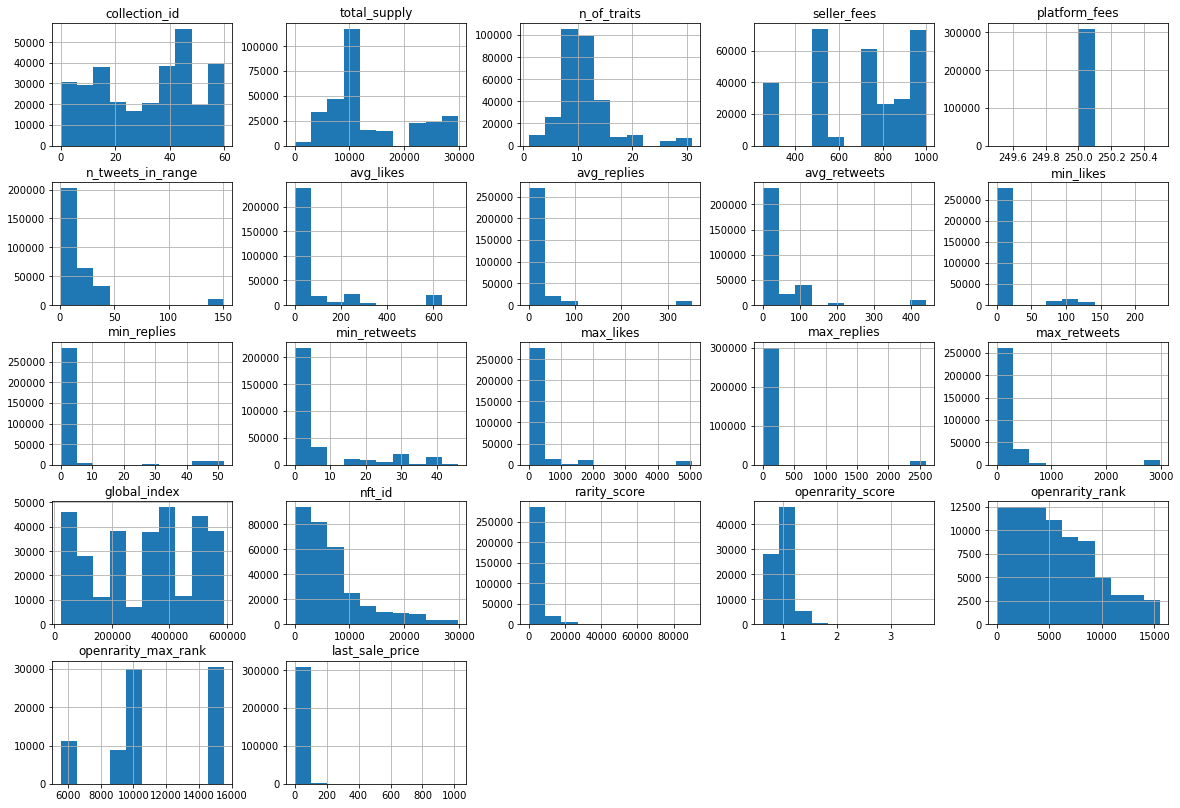

In [241]:
_ = train_with_collection.hist(figsize=(20, 14))

In [252]:
from scipy.stats import boxcox
train_with_collection["openrarity_max_rank"]= boxcox(train_with_collection["openrarity_max_rank"], 0)

In [253]:
train_with_collection.corr()["last_sale_price"]

collection_id         -0.118710
total_supply          -0.081918
n_of_traits           -0.107547
seller_fees           -0.217513
platform_fees               NaN
openrarity_enabled    -0.018842
has_website                 NaN
has_own_twitter             NaN
has_discord            0.108122
has_medium            -0.033832
n_tweets_in_range     -0.033210
avg_likes              0.044742
avg_replies            0.001231
avg_retweets           0.131632
min_likes              0.021865
min_replies            0.052180
min_retweets           0.267012
max_likes              0.014106
max_replies           -0.012231
max_retweets           0.081139
global_index          -0.096667
nft_id                -0.055394
rarity_score          -0.040550
openrarity_score       0.076267
openrarity_rank       -0.104444
openrarity_max_rank   -0.071277
last_sale_price        1.000000
Name: last_sale_price, dtype: float64